# 1 - Perkenalan

**Bab pengenalan harus diisi dengan identitas.**

---------

**Hussein MS | Batch 10 | Phase 1**

------

# 2. Judul/Penanda Soal 

**Soal dan judul problem yang dikerjakan**

------

**Objektif**

+ memahami konsep Clustering dengan menggunakan Scikit-Learn
+ mempersiapkan data untuk digunakan dalam Clustering
+ mengimplementasikan Clustering pada data yang diberikan

**Problem**

Sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. <br>
This case requires to develop a customer segmentation to define marketing strategy.

------

**Dict**

# 3. Import Libraries

**Berisi semua library yang digunakan dalam project.**

---

In [170]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

# 4. Data Loading

**Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.**

---

In [171]:
pd.options.display.max_columns = None 

In [172]:
df = pd.read_csv("census.csv")

In [173]:
df.shape

(45222, 14)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


Dataset yang diolah mempunyai bentuk ***8950 Baris dan 18 Kolom*** <br> 
Terdapat *missing value* pada dataset. handling *missing value* diperlukan pada tahap preprocessing

In [175]:
#cek sebarang missing value
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Ditemukan sebanyak **313** Missing value pada Kolom ***MINIMUM_PAYMENTS*** 

Ditemukan sebanyak **1** Missing value pada Kolom ***CREDIT_LIMIT*** 

---

In [176]:
df_cop = df.copy()

membuat copy dataset yang nantinya akan digunakan dalam proses split train-set

In [177]:
df_cop1 = df_cop.copy()

copy lain dari dataset untuk EDA 

---

# 5. EDA 

**Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.**

----

In [178]:
df_cop

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [179]:
df_cop['race'].value_counts()

 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

In [180]:
df_cop1.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [181]:
num_eda = df_cop1[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']]
cat_eda = df_cop1[['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','TENURE']]

KeyError: "None of [Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',\n       'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',\n       'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],\n      dtype='object')] are in the [columns]"

In [ ]:
sns.set_theme(style="whitegrid")
figeda, axeseda = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
i = 0
j = 0
for col in num_eda.columns:
    sns.kdeplot(data=num_eda, x=col, fill=True, ax=axeseda[i][j])
    j += 1
    if j > 3:
        j = 0
        i += 1
    if i == 3:
        break
figeda.tight_layout(pad=3.0)

Berdasarkan pengelompokan numerical Data yang sudah dilakukan, dapat kita ambil kesimpulan berupa : 

+ Semua data yang kita kelompokan tadi memiliki distribusi skew
+ Hampir semua kolom memiliki outliers

---

In [ ]:
cat_eda

In [ ]:
cat_eda.columns

In [ ]:
bf = df_cop1.groupby(by=['BALANCE_FREQUENCY']).size().reset_index(name='counts')

In [ ]:
px.line(bf, x='BALANCE_FREQUENCY', y='counts')

Berdasarkan **BALANCE_FREQUENCY** dapat kita simpulkan bahwa Mayoritas Balance dari Customer jumlahnya sering berubah. Entah itu untuk belanja/disimpan, Jumlah Balance yang terdapat pada Rekening mereka, mayoritas sering berubah. 

---

In [ ]:
pf = df_cop1.groupby(by=['PURCHASES_FREQUENCY']).size().reset_index(name='counts')
px.line(pf, x='PURCHASES_FREQUENCY', y='counts')

Berdasarkan **PURCHASES_FREQUENCY** dapat kita simpulkan bahwa terdapat 2 Peak, dimana untuk sebarannya Mayoritas orang-orang lebih sering membeli sesuatu daripada tidak membeli

---

In [ ]:
opf = df_cop1.groupby(by=['ONEOFF_PURCHASES_FREQUENCY']).size().reset_index(name='counts')
px.line(opf, x='ONEOFF_PURCHASES_FREQUENCY', y='counts')

**ONEOFF_PURCHASES_FREQUENCY** menunjukan bahwa, banyak orang yang jarang melakukan oneoff purchase

-----

In [ ]:
corr_matrox = df_cop1.corr()
# corr_matrox.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrox[(corr_matrox >= 0.5) | (corr_matrox <= -0.5)], square=True, annot=True, fmt='.2f')

Kita set thresholdnya di Value 0.5, kita lihat ternyata beberapa kolom saling berkorelasi dengan kolom lainnya. 

----

# 6. Data Preprocessing 

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.**

---

In [182]:
data_inf = df_cop.sample(100, random_state=36)
data_inf

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
41556,51,Local-gov,HS-grad,9.0,Separated,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,Puerto-Rico,<=50K
41793,46,Private,11th,7.0,Widowed,Machine-op-inspct,Other-relative,White,Male,0.0,0.0,20.0,United-States,<=50K
31029,27,Self-emp-not-inc,10th,6.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,48.0,United-States,<=50K
25291,24,Private,Bachelors,13.0,Never-married,Sales,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
28966,42,Private,HS-grad,9.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,65.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31819,24,Local-gov,HS-grad,9.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,20.0,United-States,<=50K
44015,62,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024.0,0.0,40.0,United-States,>50K
25082,38,Self-emp-not-inc,HS-grad,9.0,Divorced,Farming-fishing,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
20343,44,Private,HS-grad,9.0,Married-civ-spouse,Other-service,Wife,Asian-Pac-Islander,Female,0.0,0.0,50.0,Philippines,<=50K


In [183]:
#drop index data inf dari dataset yang ada

data_train = df_cop.drop(data_inf.index)
data_train

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [184]:
#reset index terhadap data train test

data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [185]:
num_train = data_train.select_dtypes(include=(np.number)).columns.tolist()
cat_train = data_train.select_dtypes(include=['object']).columns.to_list()

#### **Outlier**

In [186]:
def diagnostic_plots(data_train, column):
    #define the figure
    plt.figure(figsize=(15,5))

    #plot the histogram
    plt.subplot(1,2,1)
    sns.histplot(data_train[column], bins=18)
    plt.title('Histogram')

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=data_train[column])
    plt.title('Boxplot')

    #show the plot
    plt.show()


In [187]:
def distribution_features(data_train, column):
    for column in column:
        print(column)
        print('Distribution:', data_train[column].skew())
        print('Kurtosis:', data_train[column].kurt())
        print('\n')

        if data_train[column].skew() < 0.5 and data_train[column].skew() > -0.5:
            print('Kemungkinan data normal')
        elif data_train[column].skew() < -1 or data_train[column].skew() > 1:
            print('Highly Skewed')
        elif data_train[column].skew() >= -0.5 or data_train[column].skew() <= 0.5:
            print('moderately skewed')
        else:
            print('Skew is zero')
            
        diagnostic_plots(data_train, column) 


---

age
Distribution: 0.5329005309328045
Kurtosis: -0.1555534352294723


moderately skewed


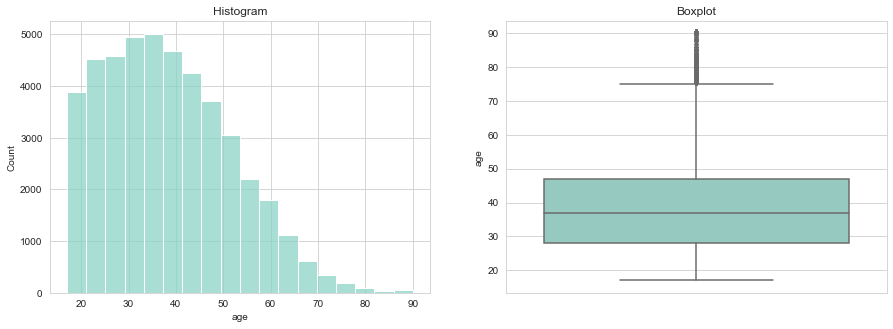

education-num
Distribution: -0.3111044565388983
Kurtosis: 0.6361931462015344


Kemungkinan data normal


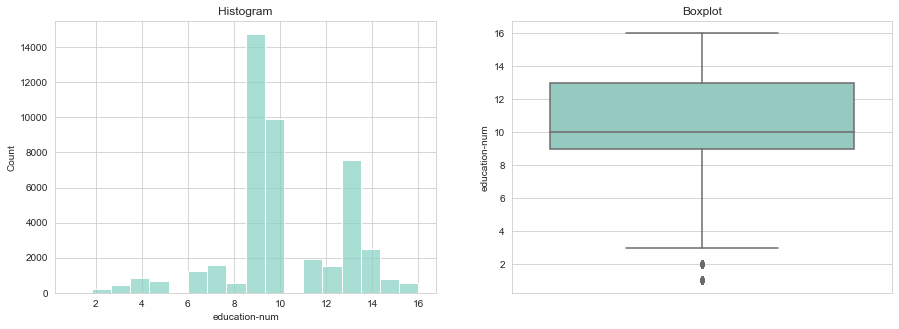

capital-gain
Distribution: 11.781115665595005
Kurtosis: 149.90952943859298


Highly Skewed


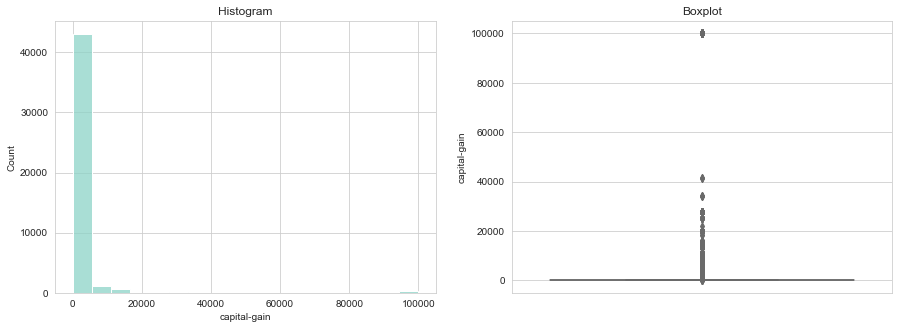

capital-loss
Distribution: 4.515752328286376
Kurtosis: 19.359711789353902


Highly Skewed


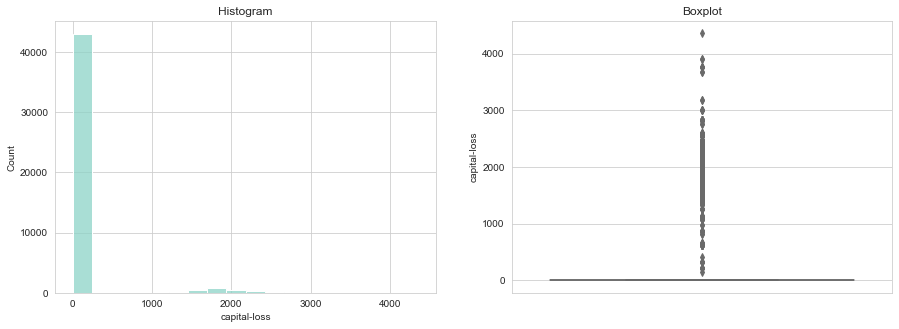

hours-per-week
Distribution: 0.3409776691461134
Kurtosis: 3.203805808837427


Kemungkinan data normal


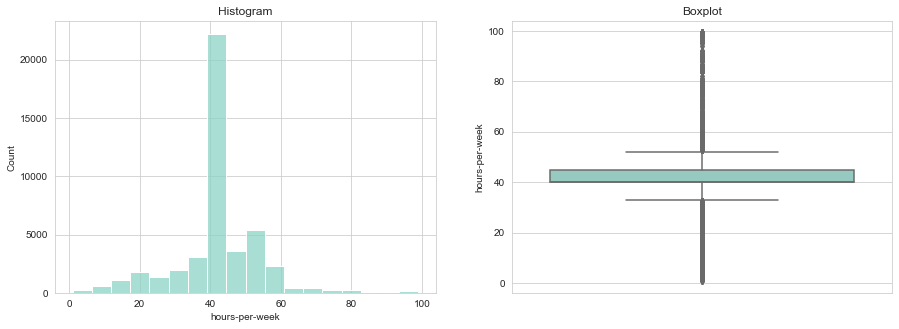

In [188]:
distribution_features(data_train, num_train)

Jika kita lihat berdasarkan distribusinya, Semua Kolom benar memiliki Distribusi Skew. artinya memang terdapat kolom yang value rangenya mempunyai perbedaan yang cukup tinggi. 

Karena dataset yang kita gunakan memiliki record dari Karakteristik seseorang, yang dimana tiap orang itu bisa berbeda, maka bisa diasumsikan semua record yang ada bersifat Unique dan jangan di drop. 
Sehingga akan kita berlakukan metode Capping sebagai cara untuk menghandling outlier.

---

#### **Capping Method**

In [189]:
data_train

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45118,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45119,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45120,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [190]:
capping = Winsorizer(capping_method='iqr', 
                     tail='both',
                     fold=1.5,
                     variables=num_train,
                     missing_values='ignore')

data_train = capping.fit_transform(data_train)


age
Distribution: 0.4751336445479816
Kurtosis: -0.3976064314762229


Kemungkinan data normal


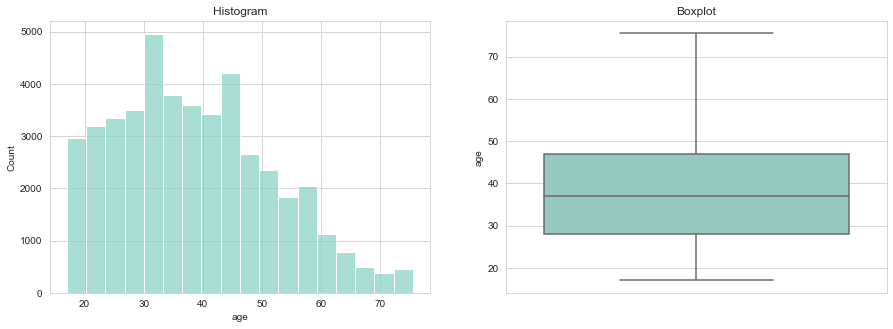

education-num
Distribution: -0.2377209319127016
Kurtosis: 0.4013813899757839


Kemungkinan data normal


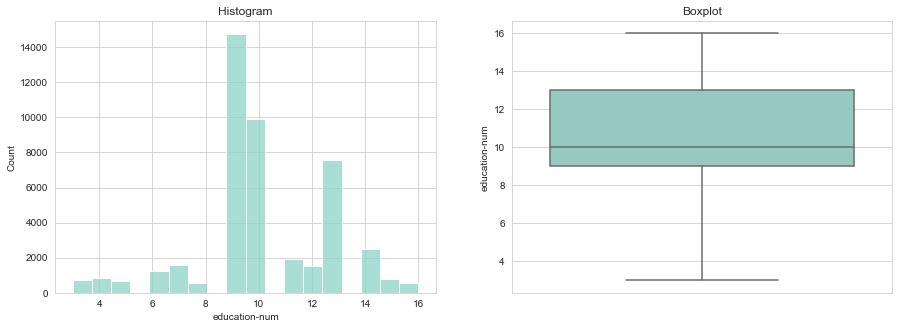

capital-gain
Distribution: 0
Kurtosis: 0


Kemungkinan data normal


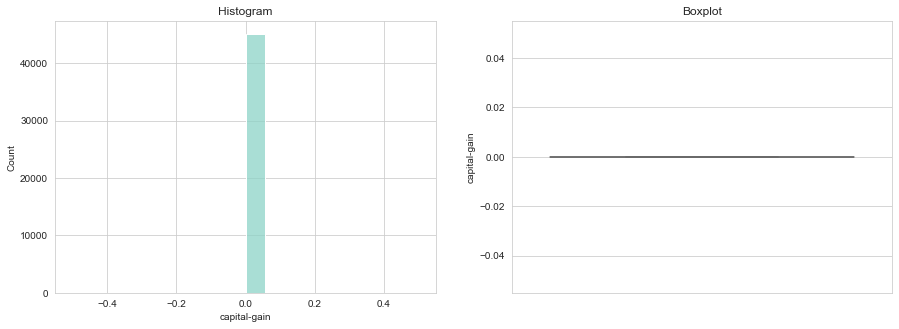

capital-loss
Distribution: 0
Kurtosis: 0


Kemungkinan data normal


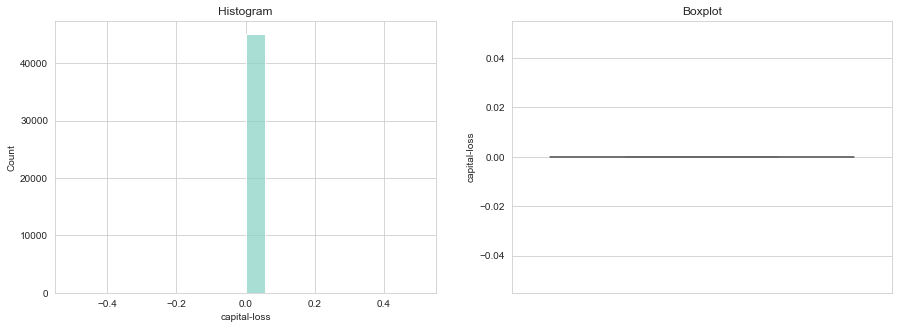

hours-per-week
Distribution: 0.42063317934846733
Kurtosis: -0.6760146304801564


Kemungkinan data normal


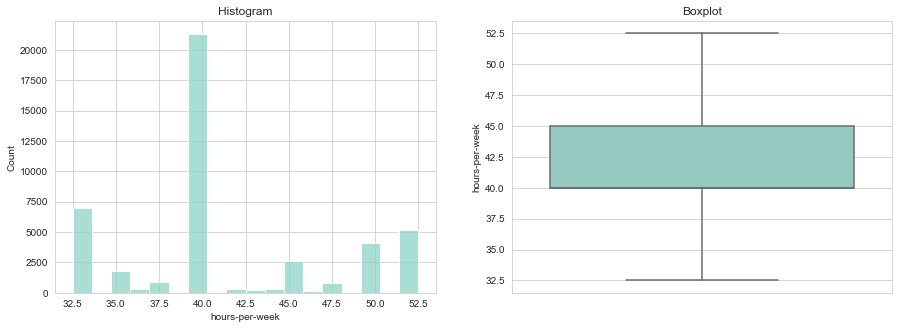

In [191]:
distribution_features(data_train, num_train)

In [192]:
data_train

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,33.0,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45118,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45119,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45120,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,United-States,<=50K


#### **Missing Value**

**Kita akan bersihkan missing value dari data train set**

In [193]:
data_train.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

----

Data telah bersih dan siap untuk dilakukan preprocessing yang lain

---

### **Feature Selection**

In [194]:
data_train = data_train.drop(['native-country'], axis=1)

In [195]:
data_train

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,33.0,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,<=50K
45118,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,<=50K
45119,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,<=50K
45120,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,<=50K


In [196]:
#get numerical features and categorical features

num_features = data_train.select_dtypes(include=(np.number))
cat_features = data_train.select_dtypes(include=['object'])

### **Feature Scalling**

**Agar tidak bias model machine learning kita, maka kita lakukan feature scalling**

Kita ketahui bahwa pada kolom income, memiliki 2 option valuenya. yaitu Income diatas 50K ataupun dibawah 50K. untuk mempermudah Analisa, kita akan ubah ke bentuk binary. dimana : 

**Income > 50K kita akan beri value 1** 

**Income <= 50K kita akan beri value 0**

In [197]:
data_train['income'].replace({'>50K':1, '<=50K':0}, inplace=True)

---

In [198]:
data_train

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,0
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,0
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,0
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,0
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,33.0,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,0
45118,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,0
45119,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,0
45120,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,0


In [199]:
num_features

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,13.0,0.0,0.0,40.0
1,50.0,13.0,0.0,0.0,32.5
2,38.0,9.0,0.0,0.0,40.0
3,53.0,7.0,0.0,0.0,40.0
4,28.0,13.0,0.0,0.0,40.0
...,...,...,...,...,...
45117,33.0,13.0,0.0,0.0,40.0
45118,39.0,13.0,0.0,0.0,36.0
45119,38.0,13.0,0.0,0.0,50.0
45120,44.0,13.0,0.0,0.0,40.0


In [200]:
# Feature Scaling using MinMaxScaler

scaler = RobustScaler()
num_scalled = scaler.fit_transform(num_features)

In [201]:
num_scalled_final = pd.DataFrame(num_scalled, columns=num_features.columns)

In [202]:
num_scalled_final

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.105263,0.75,0.0,0.0,0.0
1,0.684211,0.75,0.0,0.0,-1.5
2,0.052632,-0.25,0.0,0.0,0.0
3,0.842105,-0.75,0.0,0.0,0.0
4,-0.473684,0.75,0.0,0.0,0.0
...,...,...,...,...,...
45117,-0.210526,0.75,0.0,0.0,0.0
45118,0.105263,0.75,0.0,0.0,-0.8
45119,0.052632,0.75,0.0,0.0,2.0
45120,0.368421,0.75,0.0,0.0,0.0


---

### **Feature Encoding**

In [203]:
cat_features

,workclass,education_level,marital-status,occupation,relationship,race,sex,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0
...,...,...,...,...,...,...,...,...
45117,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0
45118,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0
45119,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0
45120,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0


Nominal Kategori Encoding :  

**marital-status** <br>
**occupation** <br>
**relationship**<br>
**race**<br>
**native-country**<br>

Ordinal Kategori Encoding : 

**workclass**<br>
**education_level**<br>




**Nominal Encoding**

In [205]:
train_nom = cat_features[['marital-status','occupation','relationship','race']]

In [206]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [207]:
encoder = OneHotEncoder()

train_norm_enc = encoder.fit_transform(train_nom).toarray()

In [208]:
dftrain_norm_enc = pd.DataFrame(train_norm_enc, columns=[str(i) for i in range(train_norm_enc.shape[1])])
dftrain_norm_enc.columns = encoder.get_feature_names_out()
dftrain_norm_enc

,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


---

**Ordinal Encoding**

In [209]:
train_ord = cat_features[['workclass','education_level']]

In [210]:
train_ord

,workclass,education_level
0,State-gov,Bachelors
1,Self-emp-not-inc,Bachelors
2,Private,HS-grad
3,Private,11th
4,Private,Bachelors
...,...,...
45117,Private,Bachelors
45118,Private,Bachelors
45119,Private,Bachelors
45120,Private,Bachelors


In [211]:
train_ord['education_level'].value_counts()

 HS-grad         14754
 Some-college     9878
 Bachelors        7553
 Masters          2506
 Assoc-voc        1951
 11th             1612
 Assoc-acdm       1506
 10th             1222
 7th-8th           822
 Prof-school       783
 9th               674
 12th              574
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64

Jika kita lihat, Education level memiliki banyak unique, ini akan mempengaruhi nilai ordinal datanya. oleh karena itu, kita akan reduce unique valuenya dengan mengelompokkan ke masing masing tingkatan 

In [212]:
train_ord['education_level'].replace({'Preschool' : 'basic6y',
                                        ' 1st-4th' : 'basic6y',
                                        ' 5th-6th' : 'basic6y',
                                        ' 7th-8th' : 'basic9y',
                                        ' 9th' : 'basic9y',
                                        ' 10th' : 'basic12y',
                                        ' 11th' : 'basic12y',
                                        ' 12th' : 'basic12y',
                                        ' HS-grad' : 'basic12y',
                                        ' Some-college' : 'university',
                                        ' Bachelors' : 'university'                                       
                                        }, inplace=True)

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_20724\2845908481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ord['education_level'].replace({'Preschool' : 'basic6y',


In [213]:
dict = [{'col' : 'workclass', 'mapping' :{' Private':0, ' Federal-gov ':1, ' State-gov':2, 'Local-gov':3, ' Self-emp-inc':4, ' Self-emp-not-inc':5, ' Without-pay':6, 'Never-worked':7}},
         {'col': 'education_level', 'mapping':{' basic6y':0, ' basic9y':1, ' basic12y':2, ' Prof-school':3, ' Assoc-acdm':4, ' Assoc-voc':5, ' university':6, ' Masters':7, ' Doctorate':8}}]

In [214]:
import category_encoders as ce

In [215]:
ord = ce.OrdinalEncoder(cols=[['workclass','education_level']], mapping=dict)

In [216]:
train_ord_enc = ord.fit_transform(train_ord).to_numpy()

In [217]:
dftrain_ord_enc = pd.DataFrame(train_ord_enc, columns=train_ord.columns)

In [218]:
dftrain_ord_enc['workclass'].value_counts()

 0.0    33231
-1.0     4495
 5.0     3789
 2.0     1941
 4.0     1645
 6.0       21
Name: workclass, dtype: int64

---

**Setelah kita Encoding semua feature kategorikal tadi, kita concate untuk menjadi 1 kesatuan DataFrame**

In [219]:
data_train_enc = pd.concat([dftrain_norm_enc, dftrain_ord_enc], axis=1)

In [220]:
data_train_end = pd.concat([num_scalled_final, data_train_enc], axis=1)

In [221]:
data_train

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,0
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,0
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,0
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,0
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,33.0,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,0
45118,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,0
45119,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,0
45120,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,0


In [222]:
data_train_end

,age,education-num,capital-gain,capital-loss,hours-per-week,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,workclass,education_level
0,0.105263,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.0
1,0.684211,0.75,0.0,0.0,-1.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,-1.0
2,0.052632,-0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
3,0.842105,-0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
4,-0.473684,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,-0.210526,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
45118,0.105263,0.75,0.0,0.0,-0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
45119,0.052632,0.75,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
45120,0.368421,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0


---

### **Variance Inflation Factor** 

In [223]:
vif_train = pd.DataFrame()
vif_train['feature'] = data_train_end.columns

# Calculate the VIF
vif_train['VIF'] = [variance_inflation_factor(data_train_end.values, i) for i in range(len(data_train_end.columns))]
vif_train.sort_values(by='VIF', ascending=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
37,workclass,1.132463
4,hours-per-week,1.222783
38,education_level,1.419623
0,age,1.628254
1,education-num,1.856351
6,marital-status_ Married-AF-spouse,inf
36,race_ White,inf
35,race_ Other,inf
34,race_ Black,inf
33,race_ Asian-Pac-Islander,inf


In [224]:
vif_train.loc[vif_train['VIF'] < 5 ]

,feature,VIF
0,age,1.628254
1,education-num,1.856351
4,hours-per-week,1.222783
37,workclass,1.132463
38,education_level,1.419623


In [225]:
vif_train.loc[vif_train['VIF'] > 10 ]

,feature,VIF
5,marital-status_ Divorced,inf
6,marital-status_ Married-AF-spouse,inf
7,marital-status_ Married-civ-spouse,inf
8,marital-status_ Married-spouse-absent,inf
9,marital-status_ Never-married,inf
10,marital-status_ Separated,inf
11,marital-status_ Widowed,inf
12,occupation_ Adm-clerical,inf
13,occupation_ Armed-Forces,inf
14,occupation_ Craft-repair,inf


Nilai VIF menunjukkan bahwa dari 81 kolom tersebut, ada 6 kolom yang nilainya dibawah, 2 Kolom dengan NaN(Missing Value karena ada operasi matematika yang dibagi 0 dalam perhitungan VIF), dan 73 kolom yang nilainya diatas 5.

Berdasarkan VIF, dapat diketahui bahwa dari 81 kolom dapat direduksi hingga 73 kolom. Hal ini merupakan asumsi awal, untuk nilai pastinya harus dibuktikan dengan mengecek Cummulative EVR, serta grafik. 

---

### **Reduction Dimention (PCA)**

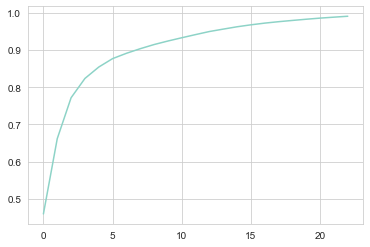

In [226]:
pca=PCA(n_components=0.99).fit(data_train_end)

cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)
plt.show()

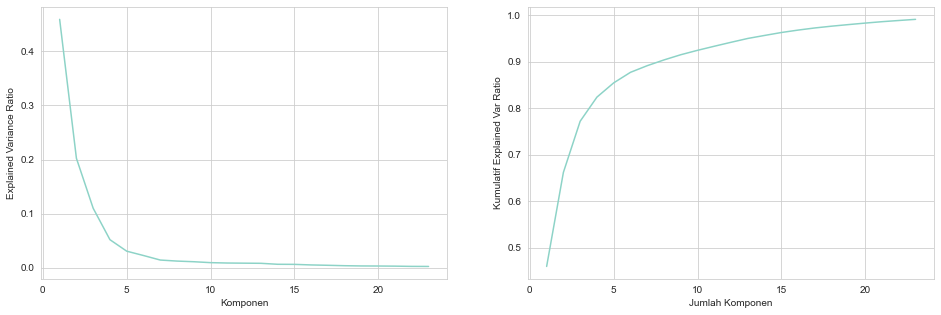

In [228]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,24),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,24),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

+ Degradasi Niai EVR Gradual dari komponen pertama hingga akhir 
+ Patahan terjadi pada Komponen ke 4, dengan Kumulatif EVR mendekati 80% kemungkinan terlihat cukup baik untuk digunakan, jumlah 9 komponen juga menarik karena Kumulatif EVR nya mendekati atau diatas 90% 

---

In [229]:
np.sum(pca.explained_variance_ratio_)

0.9908392442448447

In [230]:
pca.n_components_

23

In [231]:
pcaf = PCA(n_components=0.85).fit(data_train_end)
dotry = PCA(n_components=0.85).fit_transform(data_train_end)

In [232]:
pcaf.n_components_

5

In [233]:
np.sum(pcaf.explained_variance_ratio_)

0.8542166775406536

Kita set n_componenets sebesar 85% pada PCA, dari hasilnya dapatkan total **Komponen sebanyak 6**, dan dari 6 Komponen ini, mengangkut total informasi sebanyak **86%**.

---

# 7. Model Definition

**Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.**

----

### **Clustering**

#### **K-Means**

In [234]:
kmeanf1 = KMeans(n_clusters=2)
kmeanf1.fit(dotry)

KMeans(n_clusters=2)

Deklarasi awal kmeans, untuk percobaan awal kita set 2 cluster 

---

In [235]:
print(kmeanf1.labels_)
print(kmeanf1.inertia_)

[0 0 0 ... 0 0 0]
263030.65052136837


Cek labels dari K-Means dan Inertia nya, didapatkan hasil inertia sebesar 280035 

Inertia mengukur seberapa baik dataset di cluster oleh K-Means. hal ini dikalkulasi dengan cara mengukur jarak antar data point dengan centroidnya, kemudian di kuadratkan, dan ditambahkan antar tiap cluster.

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

---

**Elbow Method**

Text(0, 0.5, 'Inertia')

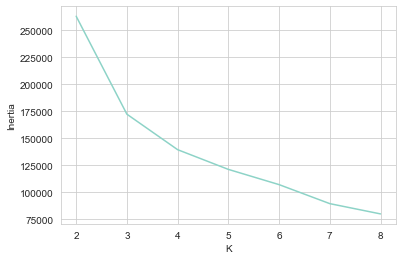

In [236]:
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(dotry).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Jika kita perhatikan, **patahan terjadi pada K = 3** 

Asumsi awal adalah, kita akan menggunakan **Jumlah Cluster** sebanyak **3** Kelompok

---

**Silhouette Method**

Text(0, 0.5, 'Silhouette Score')

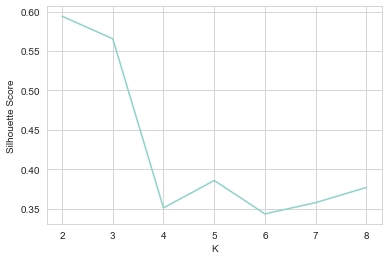

In [237]:
#cek silhouette score

K=[2,3,4,5,6,7,8]
s_score=[silhouette_score(dotry, KMeans(n_clusters=i).fit(dotry).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

Silhoutte Score mengukur seberapa mirip tiap data dengan Clusternya(cohesion) yang dibandingkan dengan Cluster lainnya(Separation). 

Range dari Silhouette Score diukur dari jarak -1 sampai dengan 1, dimana hasil tertinggi(mendekati 1) artinya menunjukan bahwa suatu data cocok dengan Clusternya dan perbandingan dengan Cluster lainnya tidak menunjukan kecocokan. 

**EN version** <br>
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

---

**Plotting from Silhouette Score**

In [238]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=36)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.5940870521265195
For n_clusters = 3 The average silhouette_score is : 0.5655454081335417
For n_clusters = 4 The average silhouette_score is : 0.38522015204160953
For n_clusters = 5 The average silhouette_score is : 0.35179978205982454
For n_clusters = 6 The average silhouette_score is : 0.3687425509965624
For n_clusters = 7 The average silhouette_score is : 0.35818177753430264
For n_clusters = 8 The average silhouette_score is : 0.3770384881289153


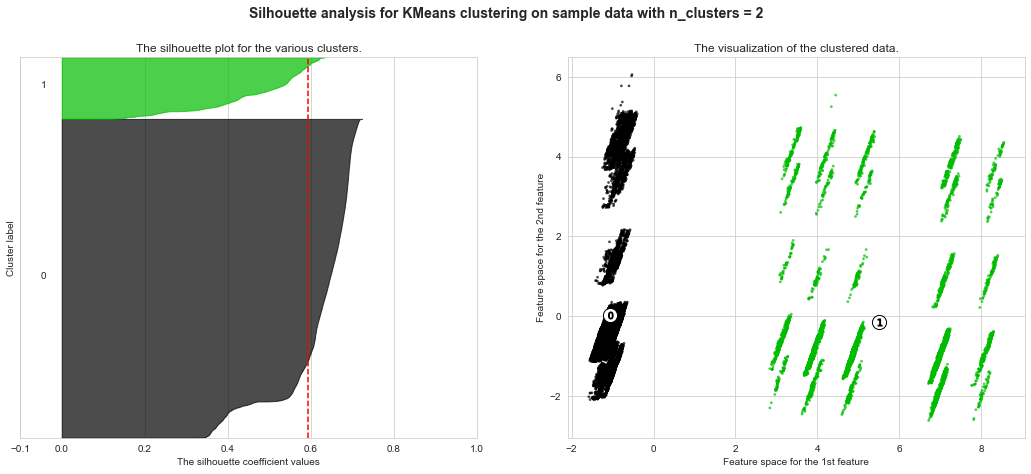

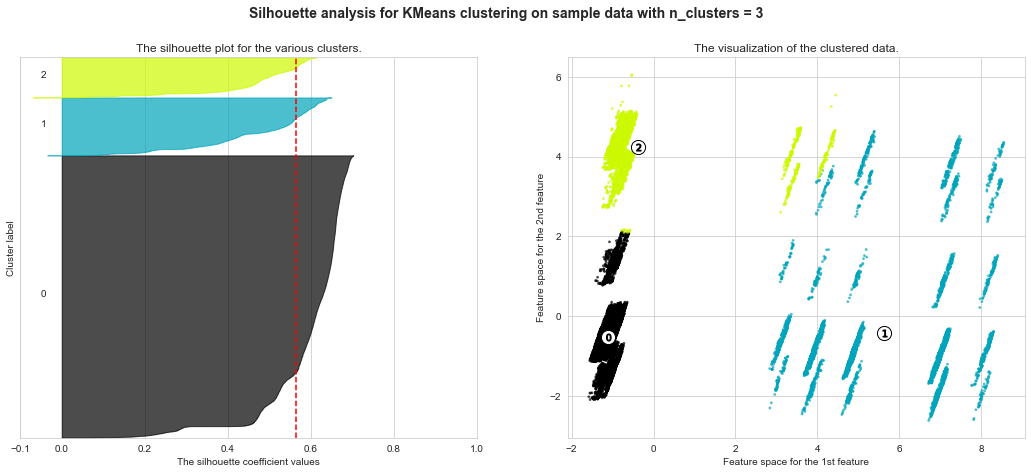

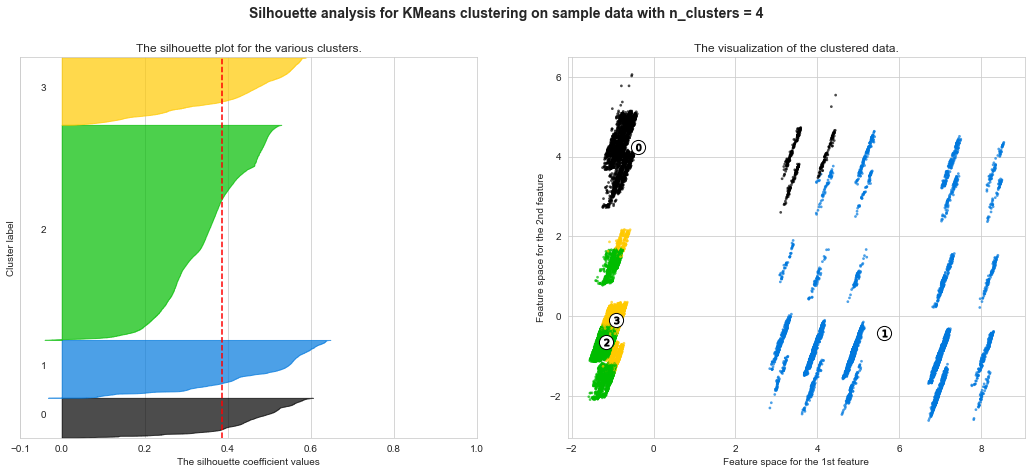

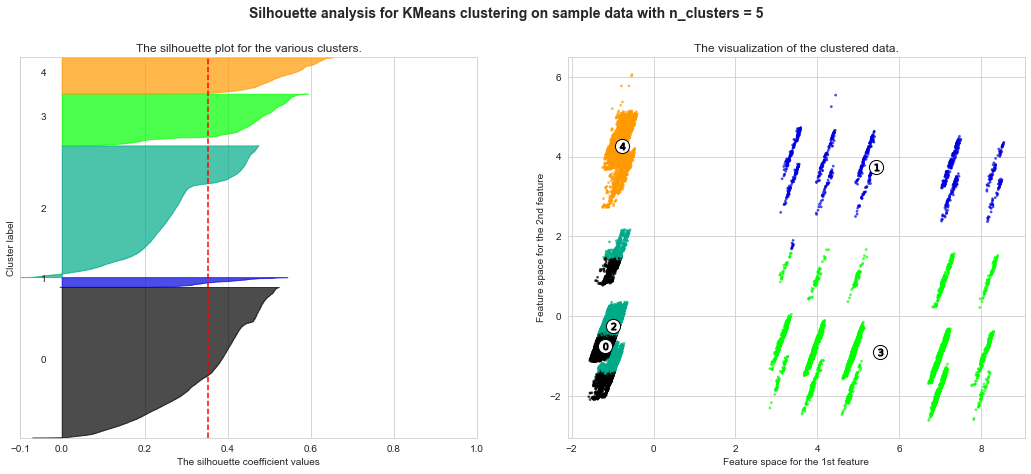

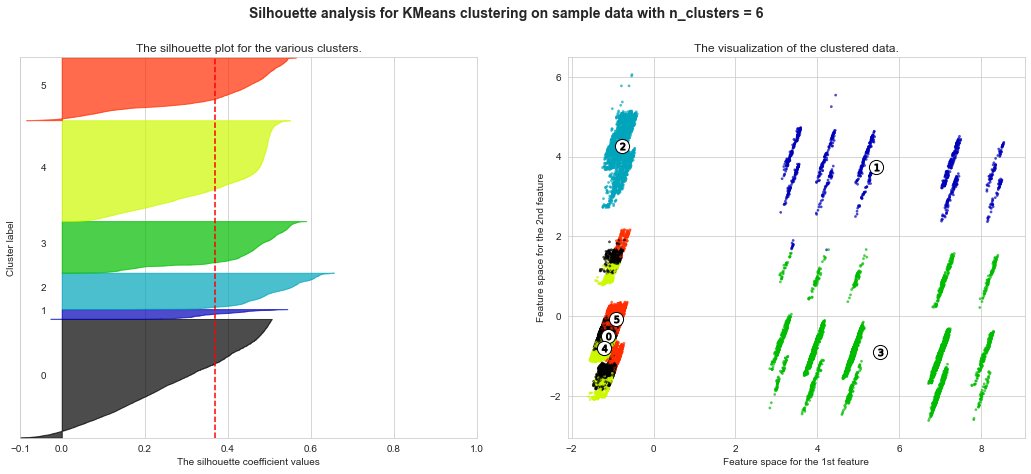

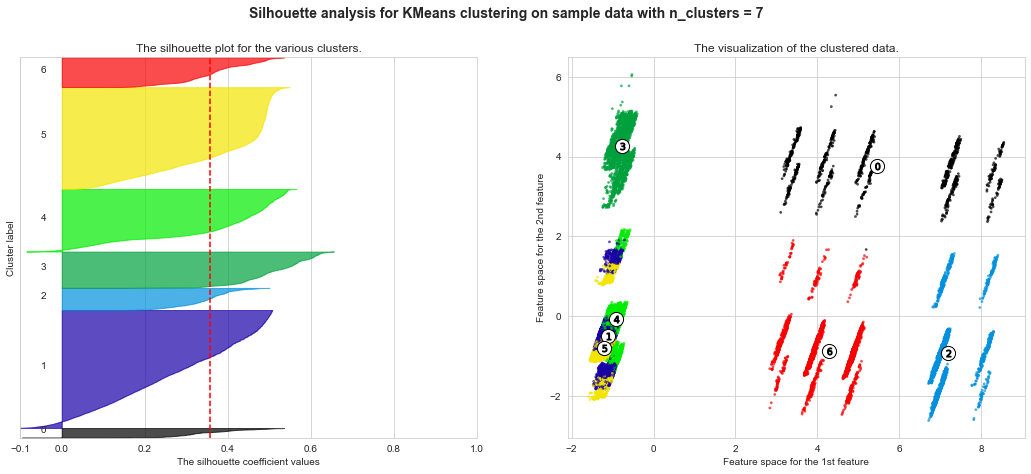

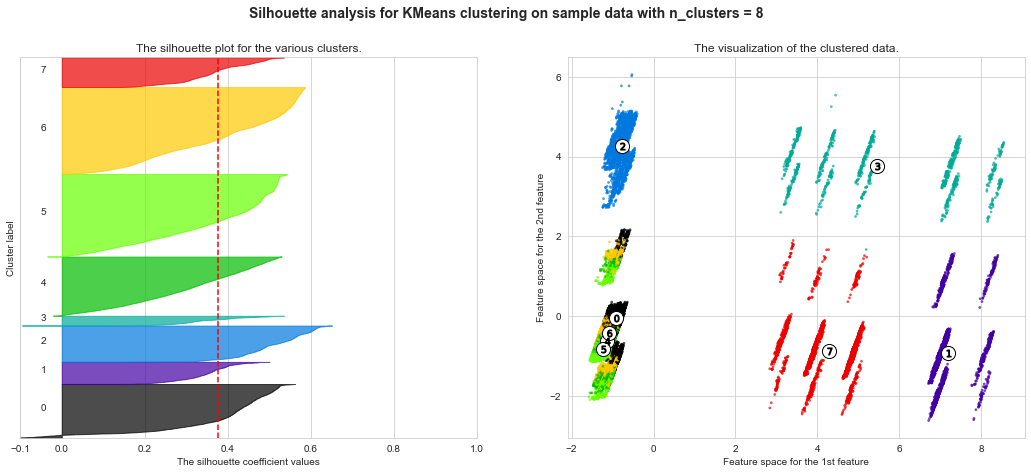

In [239]:
plot_silhouette(K,dotry)

Dari hasil perhitungan Silhouette Score, didapatkan hasil : 
+ For n_clusters = 2 The average silhouette_score is : 0.5769396579635833
+ For n_clusters = 3 The average silhouette_score is : 0.5420042885755124
+ For n_clusters = 4 The average silhouette_score is : 0.35422064914661494
+ For n_clusters = 5 The average silhouette_score is : 0.32270860792228656
+ For n_clusters = 6 The average silhouette_score is : 0.32777442911881144

Jika dilihat dari nilai scorenya, **2 Cluster** menunjukan hasil score terbaik diantara jumlah Cluster yang lain, jika kita mau, maka bisa kita gunakan **2 Cluster** sebagai n_component yang akan kita pakai pada model K-Means yang akan kita gunakan. 

---

#### **GMM** 

In [240]:
dotry

array([[-0.90948241,  1.27435693,  0.73938516, -0.88321347,  0.55110075],
       [-0.77379062,  4.1440974 ,  2.3878503 ,  1.0726254 , -0.25407087],
       [-1.13522622, -0.58652339,  0.13896252, -0.26906089,  0.85952887],
       ...,
       [-0.74671771,  0.05920595, -2.07603281,  0.2138439 , -0.45332505],
       [-1.01014665, -0.59283342,  0.16605491, -0.13649265,  0.60773311],
       [-0.53378016,  4.00447239, -1.49534386, -0.37482922, -0.56381085]])

In [241]:
dotry_reduc = scaler.fit_transform(np.append(dotry,data_train_end,axis=1))

In [242]:
gm = GaussianMixture(n_components=2, random_state=36)
gmf = gm.fit(dotry)

**Check AIC dan BIC Score**

In [243]:
gm.aic(dotry)

644255.554820085

In [244]:
gm.bic(dotry)

644612.9569537536

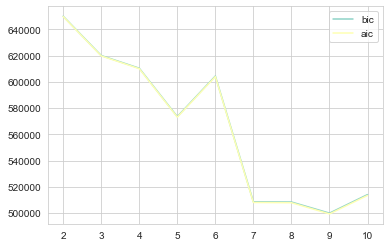

In [245]:
n_gauss=[2,3,4,5,6,7,8,9,10]
bic=[]
aic=[]
for g in n_gauss:
    gm=GaussianMixture(n_components=g,covariance_type='tied').fit(dotry)
    bic.append(gm.bic(dotry))
    aic.append(gm.aic(dotry))

plt.plot(n_gauss,bic,label='bic')
plt.plot(n_gauss,aic,label='aic')
plt.legend()

Jika dilihat, AIC terendah ada pada n sebesar 9 

---

In [246]:
gm_r1 = GaussianMixture(n_components=8, random_state=36, covariance_type='full').fit(dotry)
print(gm_r1.aic(dotry))

260721.19918153432


In [247]:
gm_r2 = GaussianMixture(n_components=8, random_state=36, covariance_type='diag').fit(dotry)
print(gm_r2.aic(dotry))

361159.38305738603


In [248]:
gm_r1 = gm.predict(dotry)

In [274]:
gmm_dt = pd.concat([data_train_end,pd.DataFrame(gm_r1)],axis=1)

In [275]:
gmm_dt.rename(columns={0:'predicted-cluster'},inplace=True)

In [276]:
gmm_dt

,age,education-num,capital-gain,capital-loss,hours-per-week,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,workclass,education_level,predicted-cluster
0,0.105263,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.0,8
1,0.684211,0.75,0.0,0.0,-1.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,-1.0,6
2,0.052632,-0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,2
3,0.842105,-0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,7
4,-0.473684,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,-0.210526,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,9
45118,0.105263,0.75,0.0,0.0,-0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,2
45119,0.052632,0.75,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0
45120,0.368421,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,2


# 8. Model Training

**Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.**

---

Clustering dengan KMeans dimana datanya adalah hasil PCA. dan hasil analisa dari Elbow & Silhouette Method 

In [261]:
kmean = KMeans(n_clusters=3)
kmeanc1 = kmean.fit_transform(dotry)
labels = kmean.labels_

In [262]:
cluster_km = pd.DataFrame(kmeanc1)
cluster_km

,0,1,2
0,3.186247,2.237817,6.858145
1,2.283110,5.395815,8.259719
2,4.968038,0.932101,6.823094
3,4.883087,1.267740,6.903034
4,4.864889,0.490086,6.597169
...,...,...,...
45117,4.992304,0.916105,6.672220
45118,5.099665,1.262770,6.732195
45119,4.919165,2.162432,6.766330
45120,4.913292,0.681817,6.667771


# 9. Model Evaluation

**Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

---

**K-Means**

**Visualisasi Cluster**

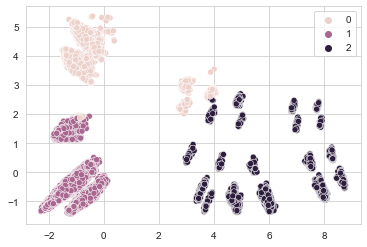

In [263]:
pca1 = PCA(n_components=2).fit_transform(cluster_km)


sns.scatterplot(x=pca1[:,0], y=pca1[:,1], hue=labels)
plt.show()

Pada bagian ini, belum kita tentukan kriteria dari tiap Clusternya. kita akan analisa berdasarkan EDA 

---

**EDA Hasil Cluster**

In [264]:
clusters = pd.concat([data_train, pd.DataFrame({'cluster':labels})], axis=1)

In [265]:
clusters['education_level'].replace({'Preschool' : 'basic6y',
                                        ' 1st-4th' : 'basic6y',
                                        ' 5th-6th' : 'basic6y',
                                        ' 7th-8th' : 'basic9y',
                                        ' 9th' : 'basic9y',
                                        ' 10th' : 'basic12y',
                                        ' 11th' : 'basic12y',
                                        ' 12th' : 'basic12y',
                                        ' HS-grad' : 'basic12y',
                                        ' Some-college' : 'university',
                                        ' Bachelors' : 'university'                                       
                                        }, inplace=True)

In [266]:
clusters

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,cluster
0,39.0,State-gov,university,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,0,1
1,50.0,Self-emp-not-inc,university,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,0,0
2,38.0,Private,basic12y,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,0,1
3,53.0,Private,basic12y,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,0,1
4,28.0,Private,university,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,33.0,Private,university,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,0,1
45118,39.0,Private,university,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,0,1
45119,38.0,Private,university,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,0,1
45120,44.0,Private,university,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,0,1


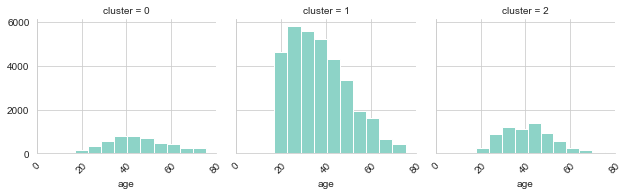

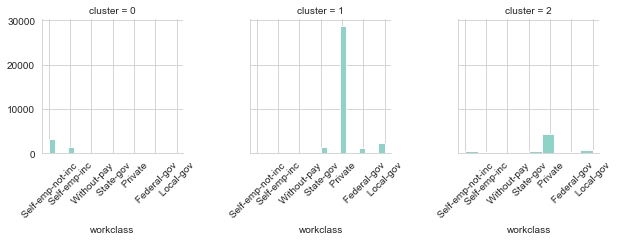

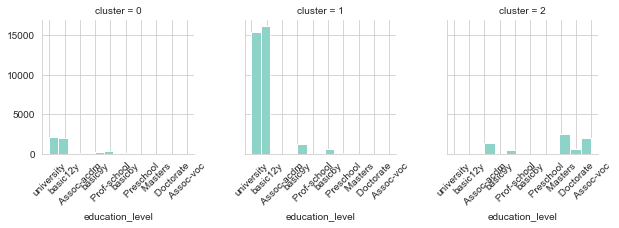

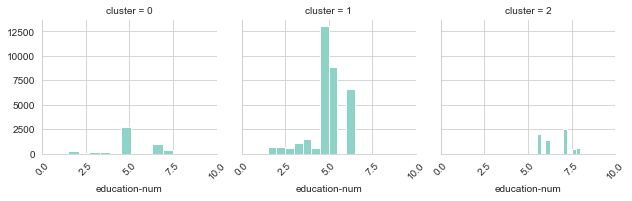

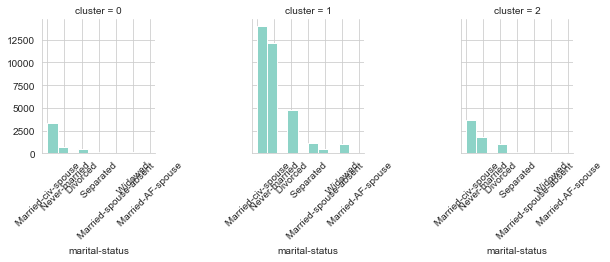

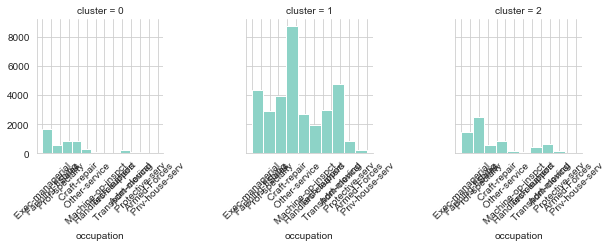

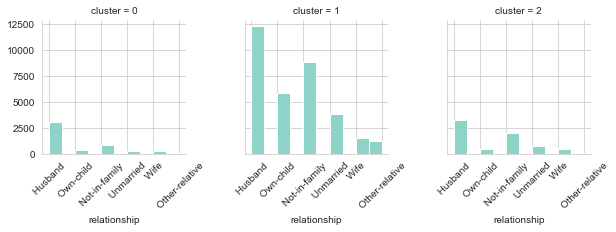

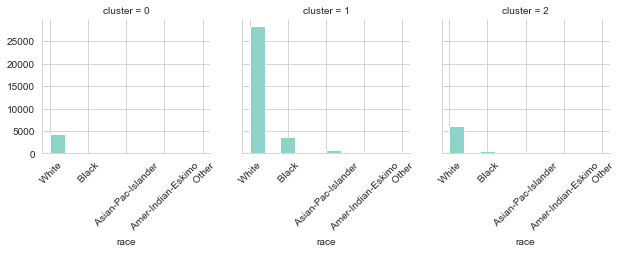

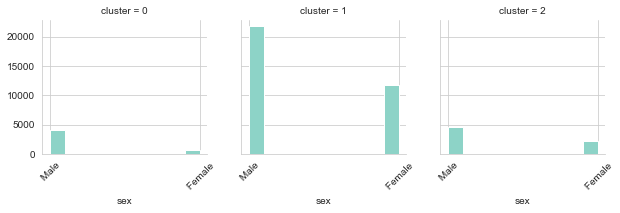

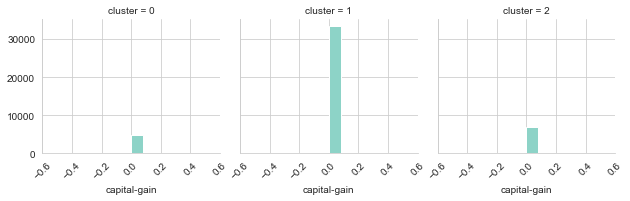

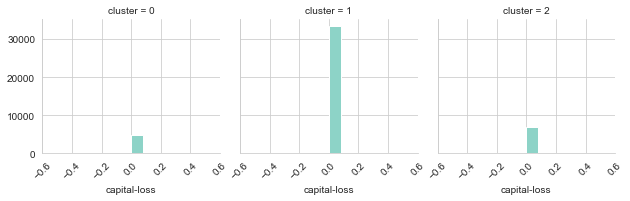

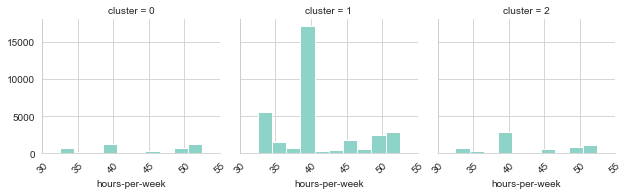

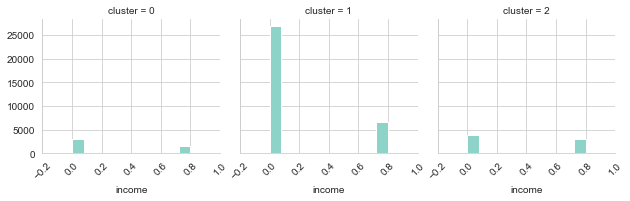

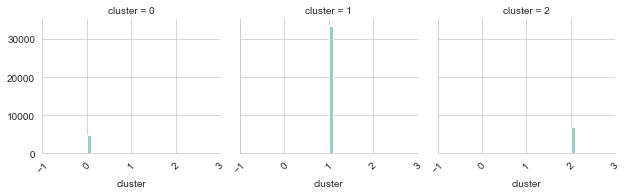

In [267]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)
    grid.tight_layout(pad=2.0)
    grid.set_xticklabels(rotation=45)

Kita akan lihat perbedaan Clusternya di tiap Feature yang memiliki perbedaan cukup signifikan 

**Balance** <br>
cluster 0 memiliki jumlah data dengan balance lebih besar dibandingkan 1 

**Purchases** <br>
Cluster 0 cenderung tidak melakukan purchase, cluster 1 lebih sering melakukan purchase 

**OneOffpurchase** <br>
Cluster 0 cenderung tidak melakukan oneoffpurchase, cluster 1 lebih sering melakukan OneOffpurchase

**InstallmentsPurchase** <br>
Cluster 0 cenderung tidak melakukan InstallmentsPurchase, cluster 1 lebih sering melakukan InstallmentsPurchase 

**CashAdvance** <br>
Cluster 0 lebih cenderung melakukan CashAdvance dibandingkan dengan Cluster 1 

**PurchaseFrequency**<br>
Cluster 0 cenderung memiliki purchase frequency yang lebih rendah dibandingkan Cluster 1 

**OneOffPurchaseFrequency**<br>
Cluster 0 cenderung tidak melakukan OneOffPurchaseFrequency, cluster 1 lebih sering melakukan OneOffPurchaseFrequency

**CreditLimits**<br>
Cluster 0 Memiliki Minimum variance credit limit yang lebih banyak, sedangkan Cluster 1 memiliki Maximum variance Credit Limit yang paling Besar 

**Payments**<br>
Cluster 0 cenderung tidak melakukan Payments, cluster 1 lebih sering melakukan Payments




Melihat dari hasil clusteringnya bisa disimpulkan bahwa :

**Cluster 0 = Who Saving** 

**Cluster 1 = Who Frequently Using** 


----

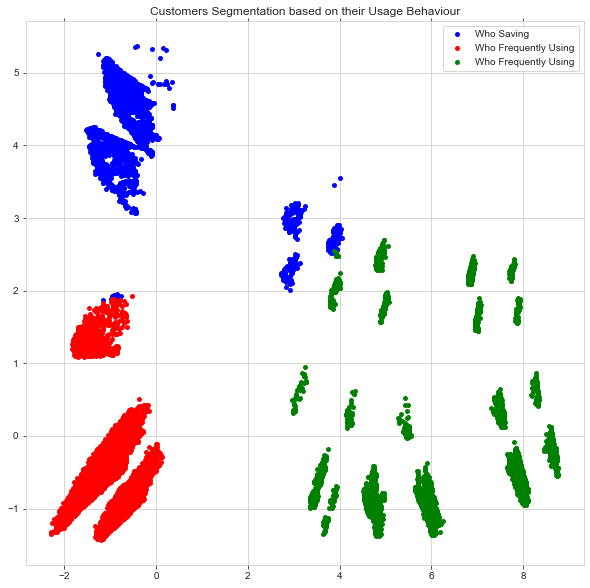

In [269]:
X1, y = pca1[:, 0], pca1[:, 1]

colors = {0: 'blue',
          1: 'red',
          2: 'green'}
          


segmen = {0: 'Who Saving',
          1: 'Who Frequently Using',
          2: 'Who Frequently Using'}
          

data_cluster = pd.DataFrame({'x': X1, 'y':y, 'label':labels}) 
groups = data_cluster.groupby('label')

fgicluster, axc = plt.subplots(figsize=(10,10))

for name, group in groups:
    axc.plot(group.x, group.y, marker='o', linestyle='', ms=5,
             color=colors[name],label=segmen[name], mec='none')
    axc.set_aspect('auto')
    axc.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    axc.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')



axc.legend()
axc.set_title("Customers Segmentation based on their Usage Behaviour")
plt.show()

**GMM**

**Visualisasi Cluster**

In [270]:
gmm_dt

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,predicted-cluster
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,0,8
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,0,6
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,0,2
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,0,7
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45117,33.0,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,0,9
45118,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,0,2
45119,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,0,0
45120,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,0,2


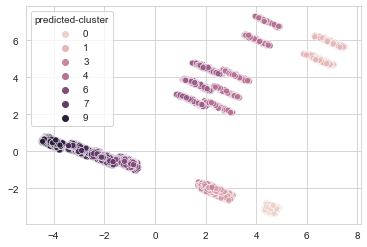

In [277]:
pcag = PCA(n_components=2).fit_transform(gmm_dt)
labelg = gmm_dt['predicted-cluster']

sns.scatterplot(x=pcag[:,0], y=pcag[:,1], hue=labelg)
plt.show()

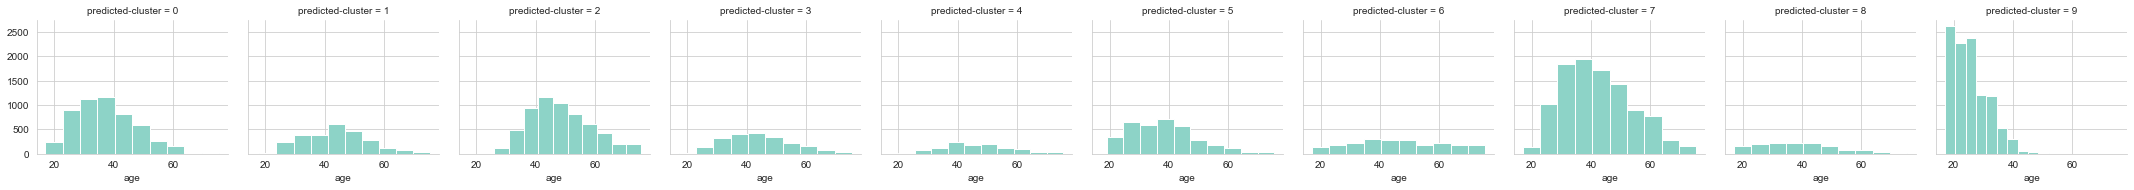

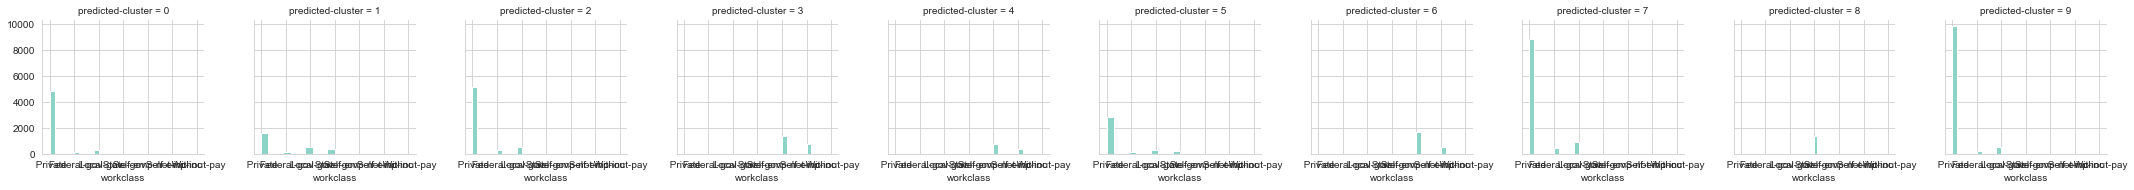

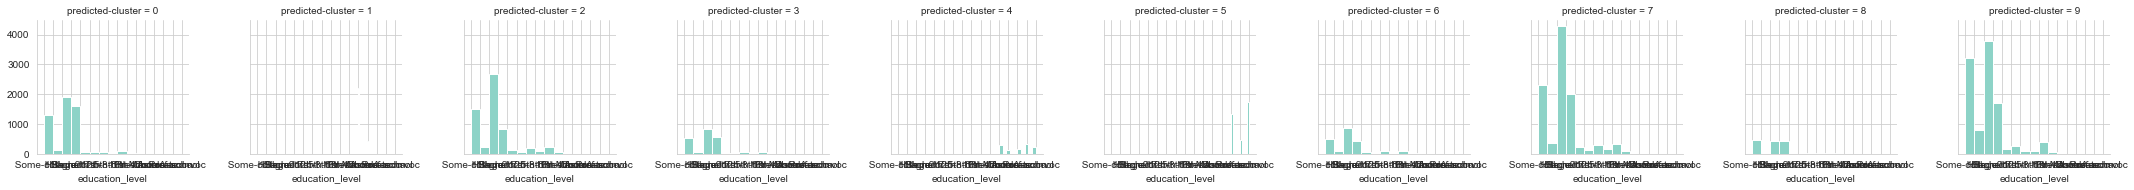

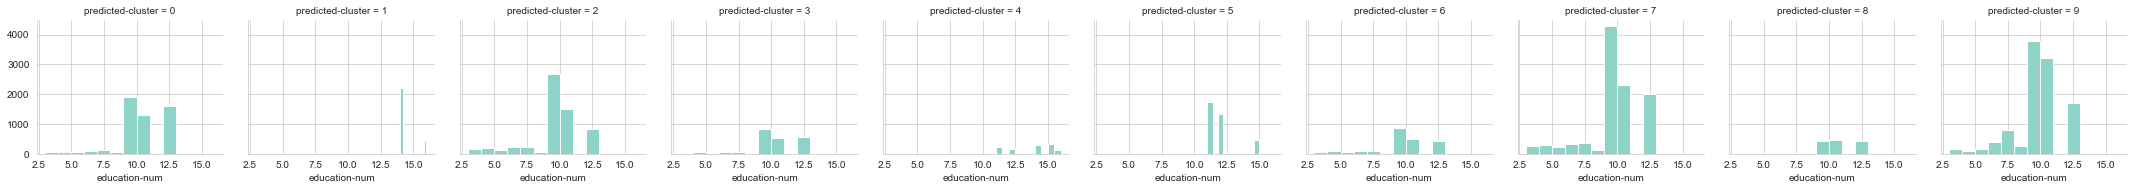

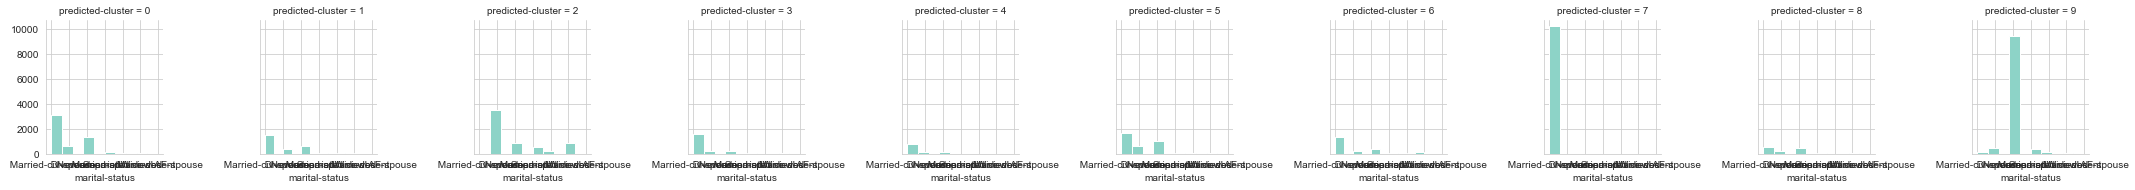

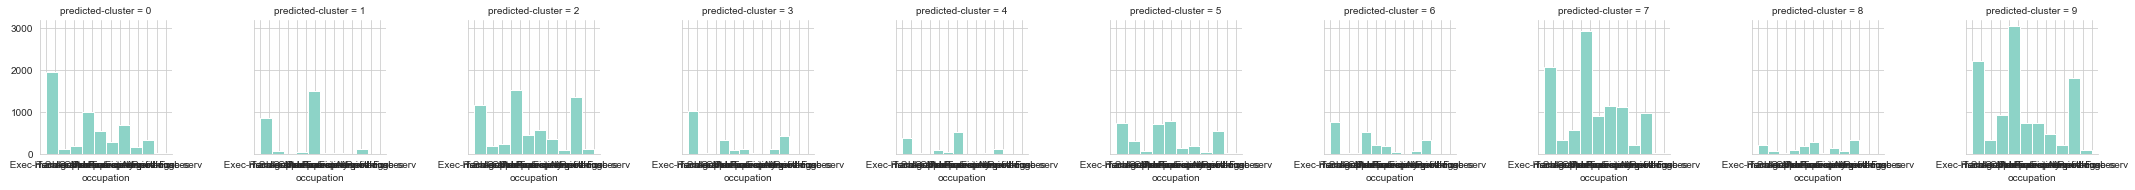

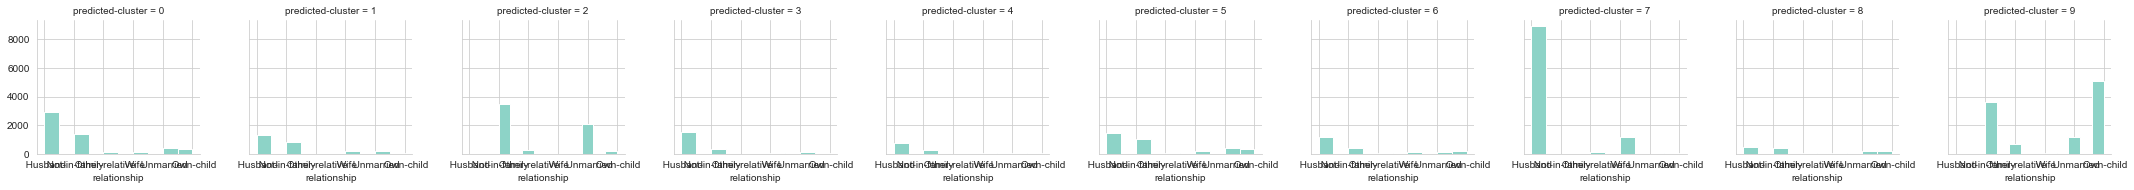

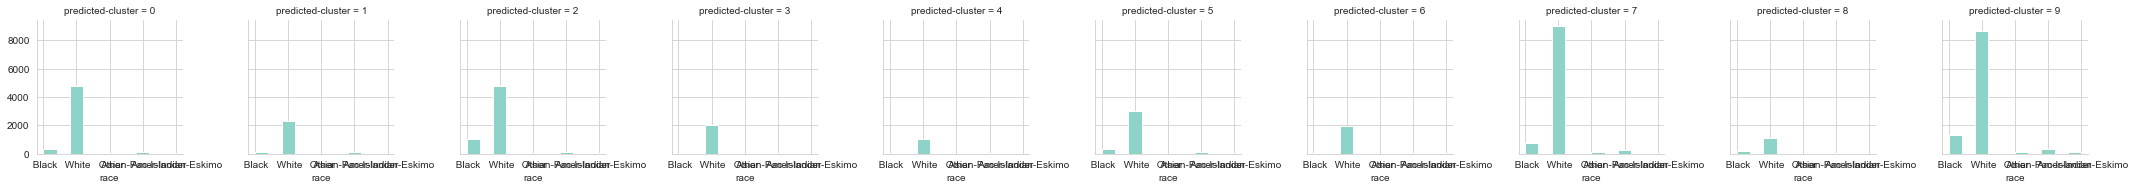

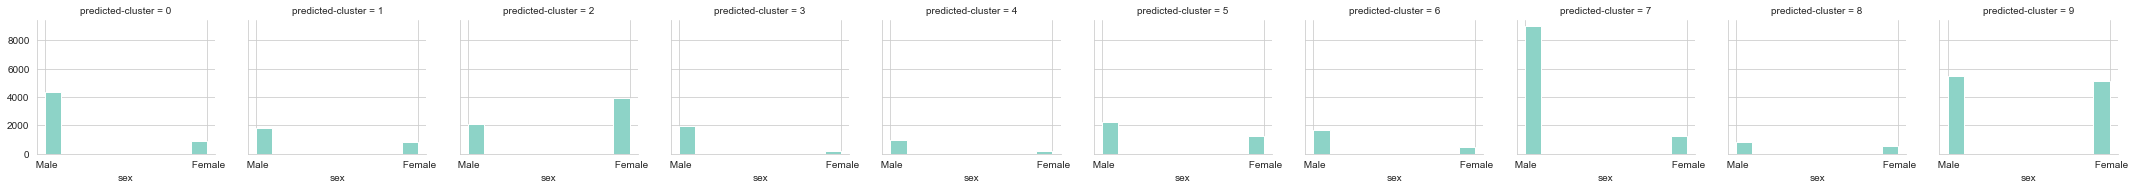

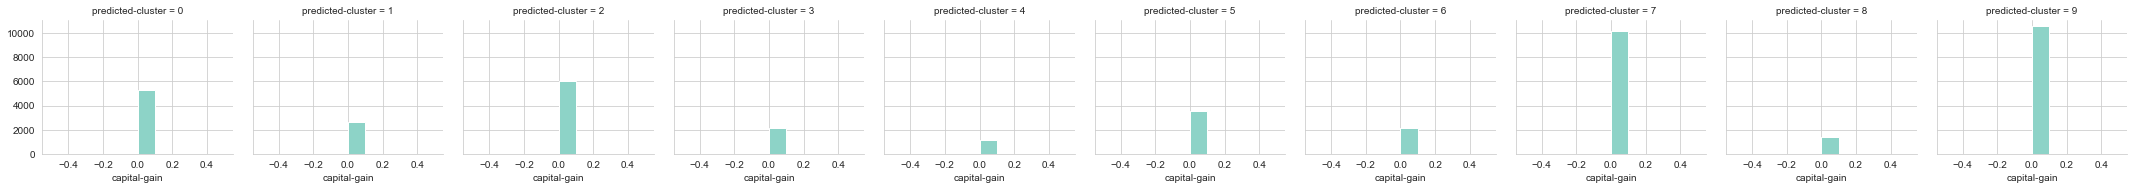

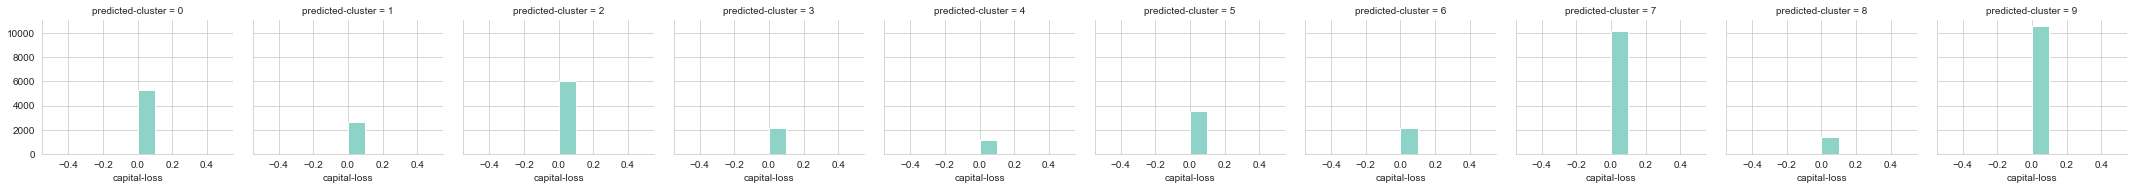

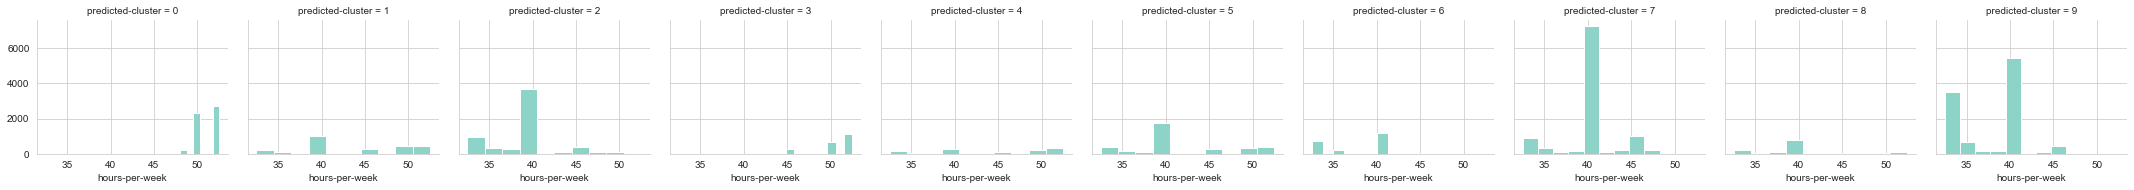

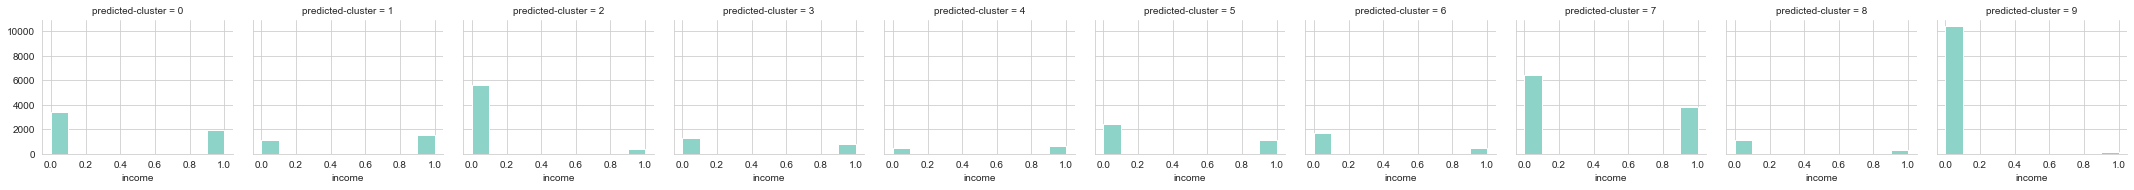

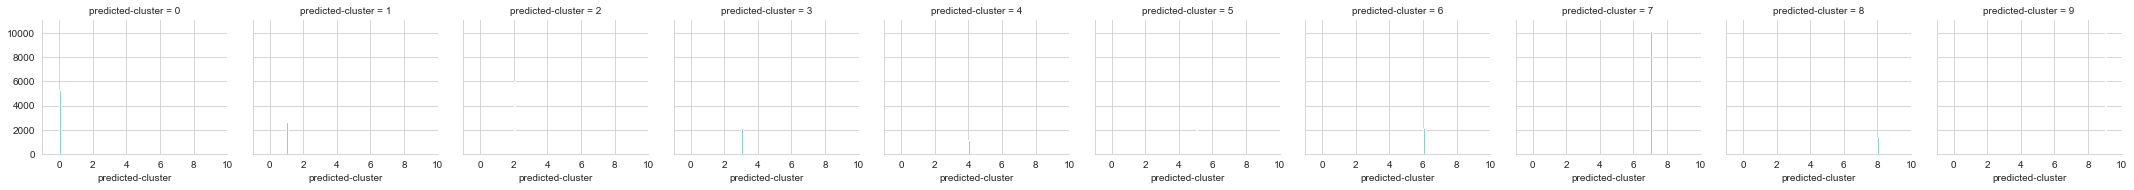

In [271]:
for c in gmm_dt:
    grid = sns.FacetGrid(gmm_dt, col='predicted-cluster')
    grid.map(plt.hist, c)
    grid.tight_layout(pad=2.0)

---

# 10. Model Inference 

**Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.**

----

In [ ]:
data_inf

In [ ]:
data_inf = data_inf.fillna(0)

In [ ]:
data_inf.isnull().sum()

In [ ]:
data_inf.drop(columns=['CUST_ID'], inplace=True)

In [ ]:
data_inf_scalled = scaler.fit_transform(data_inf)
data_inf_scalled

In [ ]:
data_inf_final = pd.DataFrame(data_inf_scalled, columns=data_inf.columns)
data_inf_final

In [ ]:
data_inf_final_c1 = PCA(n_components=0.8).fit_transform(data_inf_final)

In [ ]:
kmean_inf = KMeans(n_clusters=2).fit(data_inf_final_c1)
labels_inf = kmean_inf.labels_

In [ ]:
clusters_inf = pd.concat([data_inf_final, pd.DataFrame({'cluster':labels_inf})], axis=1)

In [ ]:
clusters_inf

In [ ]:
pca_inf = PCA(n_components=2).fit_transform(clusters_inf)

sns.scatterplot(x=pca_inf[:,0], y=pca_inf[:,1], hue=labels_inf)
plt.show()

# 11. Pengambilan Kesimpulan

**Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.**

----

Semua Algoritma Unsupervised Learning yang kita gunakan, memiliki Pengelompokan Cluster yang berbeda-beda. baik K-Means maupun GMM. 

**K-Means**

Pada Algoritma K-Means, kita mendapatkan **Total Cluster sebanyak 2** dari pertimbangan Analisa Silhouette Score dan Elbow Methodnya. 

Setelah kita lakukan EDA pada hasil Clusternya, bisa kita simpulkan bahwa : 

+ **Cluster 0** Merupakan Cluster yang Diisi oleh orang-orang yang menggunakan CC nya untuk ditabung, melihat banyaknya Jumlah Balance, dan minimnya Purchase 
+ **Cluster 1** Merupakan Cluster yang Diisi oleh orang-orang yang menggunakan CC nya untuk keperluan seharai-hari, melihat Frequent purchase dan Jumlah Balance yang lebih sedikit

**GMM**

Pada Algoritma GMM, kita dapatkan Total Cluster sebanyak, **9 Cluster** dari hasil **BIC dan AIC** Scorenya 